In [1]:
import logging
import matplotlib.pyplot as plt
import requests

import ddlpy

logging.basicConfig(level=logging.DEBUG)
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Get a list of all known locations
The  method locations gets a list of all known measurement locations by sending a request. 

In [2]:
locations = ddlpy.locations()

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): waterwebservices.rijkswaterstaat.nl:443
DEBUG:urllib3.connectionpool:https://waterwebservices.rijkswaterstaat.nl:443 "POST /METADATASERVICES_DBO/OphalenCatalogus HTTP/1.1" 200 None
/Users/baart_f/src/ddlpy/ddlpy/ddlpy.py:51: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  result['AquoMetadataLijst']


In [4]:
locations.to_csv()

(56087, 16)

## Validate
Check  if data is in the domain of the Netherlands. It also includes data of the North Sea.

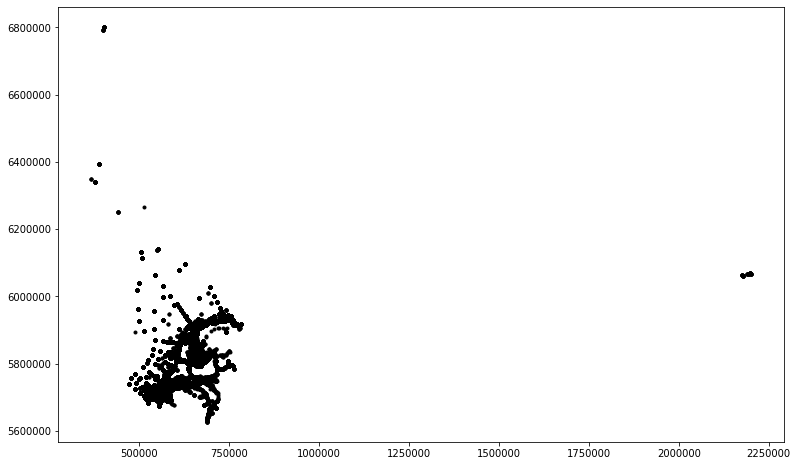

In [19]:
# Create a spatial plot
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(locations.X, locations.Y, 'k.')

In [20]:
# CHECK See what the data in the east is. 
locations.sort_values('X',  ascending=False).head(n=5)

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving
Code,,,,,,,,,,,,,,,,
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Zuurgraad Oppervlaktewater,OW,Oppervlaktewater,DIMSLS,dimensieloos,pH,Zuurgraad,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Temperatuur Oppervlaktewater oC,OW,Oppervlaktewater,oC,graad Celsius,T,Temperatuur,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Verzadigingsgraad zuurstof in Oppervlaktewater %,OW,Oppervlaktewater,%,procent,VERZDGGD,Verzadigingsgraad,NVT,Niet van toepassing,O2,zuurstof
PRIPYPSIII1,97957,25831,2.199683e+06,6.067206e+06,PRIPYAT plas III.1,Verzadigingsgraad zuurstof in Oppervlaktewater %,OW,Oppervlaktewater,%,procent,VERZDGGD,Verzadigingsgraad,NVT,Niet van toepassing,O2,zuurstof
PRIPYPSIII1,97957,25831,2.199683e+06,6.067206e+06,PRIPYAT plas III.1,Temperatuur Oppervlaktewater oC,OW,Oppervlaktewater,oC,graad Celsius,T,Temperatuur,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing


In [47]:
codes = ['HOEKVHLD', 'IJMDBTHVN']
parameters = ['WATHTE']
selected = locations[locations.index.isin(codes)]
selected = selected[selected['Grootheid.Code'].isin(parameters)]
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving
Code,,,,,,,,,,,,,,,,
HOEKVHLD,93728,25831,576917.669784,5.759136e+06,Hoek van Holland,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing
IJMDBTHVN,93757,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing


In [36]:
selected = locations[locations.Naam.str.contains('|'.join(names))].head()
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving
Code,,,,,,,,,,,,,,,,
IJMDBTN1,101149,25831,604526.834805,5.813970e+06,IJmuiden buiten 1 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing
IJMDBTN1,101149,25831,604526.834805,5.813970e+06,IJmuiden buiten 1 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0016dg,diameter kleiner dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing
IJMDN1,96384,25831,610187.782068,5.814109e+06,IJmuiden (kilometer 2),Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0063dg,diameter kleiner dan 63 um / drooggewicht,NVT,Waarde is niet van toepassing
IJMDBTN1,101149,25831,604526.834805,5.813970e+06,IJmuiden buiten 1 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0063dg,diameter kleiner dan 63 um / drooggewicht,NVT,Waarde is niet van toepassing
IJMDBTN1,101149,25831,604526.834805,5.813970e+06,IJmuiden buiten 1 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,other:Dg0063dg,diameter groter dan 63 um / drooggewicht,NVT,Waarde is niet van toepassing
